# Fundamentos de la Ciencia de Datos - Cursada 2024 - Práctico Especial

## Participantes 
- **Puggioni Bruno - bruno.puggioni@gmail.com - 44838933**
- **Saide Felipe - fsaide58@gmail.com - 44561355**

# 1.Importacion de las librerias

In [ ]:
import pandas as pd
import ydata_profiling as pp
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.stats.api as sms
import numpy as np
from os import path
from scipy import stats
from scipy.stats import shapiro, spearmanr, kruskal, kendalltau
from sklearn.linear_model import TheilSenRegressor
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score


# Configurar para mostrar todas las columnas
pd.set_option('display.max_columns', None)
# Configurar para mostrar todas las filas
pd.set_option('display.max_rows', None)

%matplotlib inline

# 2. Lectura del dataset

In [ ]:
covers_df = pd.read_csv("Covers.csv")
covers_df.head()

- **Danceability, Energy, Acousticness, Liveness, Loudness, Tempo, Popularity**: Están relacionadas con las **características musicales**.
- **Duration, Time_Signature, Key, Mode, Speechiness, Instrumentalness, Valence**: Tienen que ver con la **estructura y características adicionales de la canción.**

## Analisis estadistico de los datos

In [ ]:
covers_df.dtypes

covers_df.info()

**La gran mayoría de las columnas representan diferentes tipos de números (int, float)**, aunque algunas, como duration, son de tipo objeto pero representan valores numéricos en minutos y segundos.
**Esto nos facilitará mucho el análisis estadístico**, junto con la aplicación de modelos matemáticos, simplificando también la detección de valores atípicos y visualización de datos.
Ya de primera mano, sin hacer un analisis extra podemos ya obtener una pista de que **no va a haber demasiados o practicamente ningun valor nulo**

In [ ]:
covers_df.describe()

El conteo de datos (count) nos indica que no hay valores nulos practicamente.Sin embargo **la ausencia de valores nulos no garantiza que no haya valores incorrectos u otras representaciones de datos inválidos**<br>. Por lo demas, salvo algunas excepciones como tempo donde los cuartiles no varian y en todos predomina el valor 4.00, no notamos ningun error demasiado evidente.

# 3. Exploracion y limpieza de datos

## Valores nulos

In [ ]:
covers_df.isnull().sum()

## Duplicados

In [ ]:
covers_df.duplicated().sum()
duplicates = covers_df[covers_df.duplicated()]
duplicates

In [ ]:
covers_df = covers_df.drop_duplicates()

## Boxplot de los datos

In [ ]:
def plot_boxplots(df):
    numerica_cols = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Definir el número de columnas en el grid
    ncols = 2  # numero columas
    nrows = (len(numerica_cols) + ncols - 1) // ncols  # Calcular filas necesarias
    
    # Crear la figura y los ejes
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 6 * nrows))
    axes = axes.flatten()  # Aplanar la matriz de ejes para un acceso más fácil

    # Crear un boxplot para cada columna numérica
    for i, column in enumerate(numerica_cols):
        sns.boxplot(y=df[column], ax=axes[i], fliersize=5)  # Cambiar x a y
        axes[i].set_title(f'Boxplot de {column}', fontsize=20, color='black')  # Cambiar color del título
        axes[i].set_ylabel(column, fontsize=16, color='black')  # Cambiar color de la etiqueta Y
        axes[i].set_xlabel('Valores', fontsize=16, color='black')  # Cambiar color de la etiqueta X
        axes[i].grid(axis='x', linestyle='-', alpha=0.5, color='black')  # Eje horizontal
        axes[i].grid(axis='y', linestyle='-', alpha=0)  # Desactivar la cuadrícula vertical

    # Eliminar ejes vacíos si hay menos columnas que espacios
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    # Ajustar el layout y agregar un título general
    plt.suptitle('Boxplot de los datos', fontsize=36, color='black', y=1.04)  # Cambiar color del título general
    plt.tight_layout(rect=[0, 0, 1, 1.03]) 
    plt.show()

# mostrar los boxplots
plot_boxplots(covers_df)

## Reporte de los datos

In [ ]:
import webbrowser
import os
report = pp.ProfileReport(covers_df)
if not path.exists("covers_report.html"):
    report.to_file(output_file="covers_report.html")
else:
    print("Reporte ya descargado")
output_file = "covers_report.html"
report.to_file(output_file=output_file)

if os.path.exists(output_file):
    webbrowser.open(output_file)
else:
    print("Error al generar el informe.")

## Histograma de los datos

In [ ]:
import matplotlib.pyplot as plt

# Establecer el estilo
plt.style.use('default')

# Crear el histograma
n_cols = 2  # Número de columnas
n_rows = (len(covers_df.columns) + n_cols - 1) // n_cols  # Calcular filas necesarias

# Crear el histograma
ax = covers_df.hist(figsize=(12, 30), alpha=1, layout=(n_rows, n_cols))

# Ajustar el diseño y agregar un título
plt.tight_layout(rect=[0, 0, 1, 0.95])  
plt.suptitle('Histograma de los datos', fontsize=38)


# Mostrar el gráfico
plt.show()

## Correlaciones

In [22]:
# columnas numéricas
numerica_df = covers_df.select_dtypes(include=['float64', 'int64'])

# correlaciones
tabla_correlaciones = numerica_df.corr().unstack().drop_duplicates().sort_values(ascending=False)
tabla_correlaciones = tabla_correlaciones[tabla_correlaciones != 1]
tabla_correlaciones = tabla_correlaciones[tabla_correlaciones.abs() > 0.5]

# estilo
tabla_correlaciones_df = pd.DataFrame(tabla_correlaciones, columns=['Correlaciones'])
estilo_tabla = tabla_correlaciones_df.style.background_gradient(cmap='coolwarm').format("{:.2f}")
estilo_tabla

,,Correlaciones
Energy,Loudness,0.70
Danceability,Valence,0.53
Energy,Acousticness,-0.60


## Graficos de dispersion

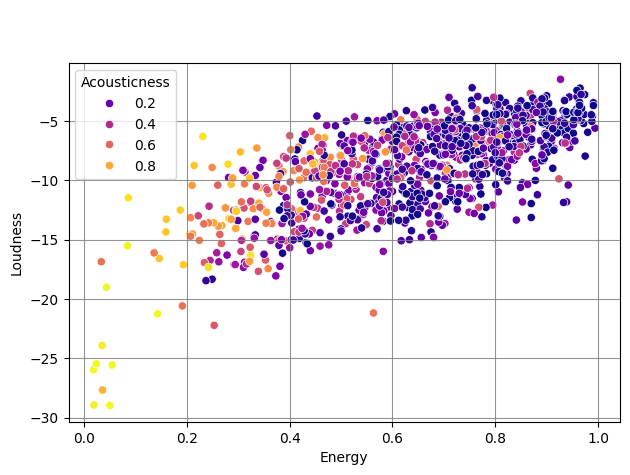

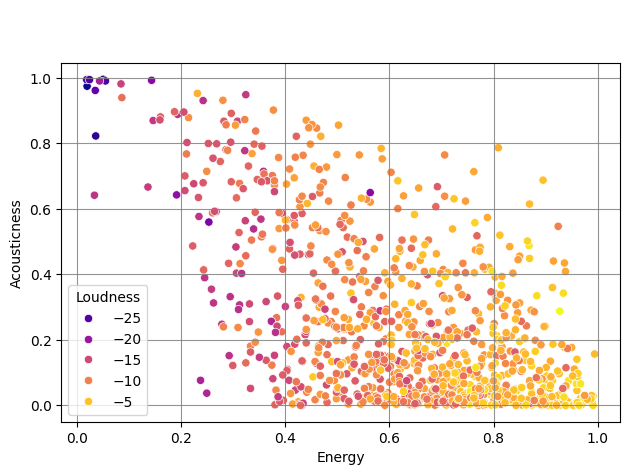

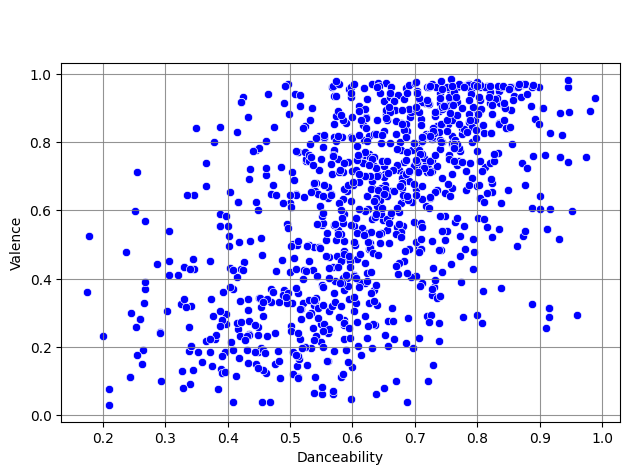

In [23]:
sns.scatterplot(data = covers_df, x='Energy', y='Loudness', hue='Acousticness', palette='plasma', alpha=1)

plt.tight_layout(rect=[0, 0, 1, 0.90])  
plt.suptitle('Energy versus Loudness', fontsize=24, color='white')
plt.grid(axis='y', linestyle='-', alpha=0.85, color='grey')  # eje horizontal
plt.grid(axis='x', linestyle='-', alpha=0.85, color='grey')  # eje vertical

plt.show()

sns.scatterplot(data = covers_df, x='Energy', y='Acousticness', hue='Loudness', palette='plasma', alpha=1)

# diseño
plt.tight_layout(rect=[0, 0, 1, 0.90])  
plt.suptitle('Energy versus Acoustiness', fontsize=24, color='white')
plt.grid(axis='y', linestyle='-', alpha=0.85, color='grey')  # eje horizontal
plt.grid(axis='x', linestyle='-', alpha=0.85, color='grey')  # eje vertical

plt.show()

sns.scatterplot(data = covers_df, x='Danceability', y='Valence', color='blue', alpha=1)

plt.tight_layout(rect=[0, 0, 1, 0.90])  
plt.suptitle('Danceability versus Valence', fontsize=24, color='white')
plt.grid(axis='y', linestyle='-', alpha=0.85, color='grey')  # eje horizontal
plt.grid(axis='x', linestyle='-', alpha=0.85, color='grey')  # eje vertical

plt.show()

## PCA

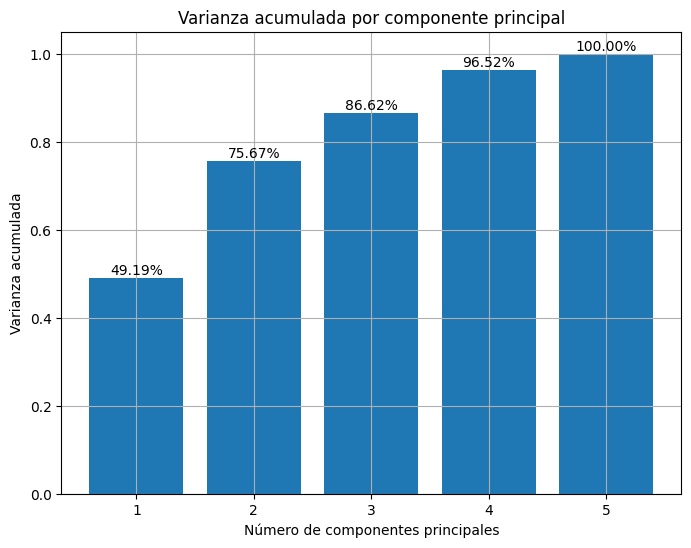

In [26]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Selección de las columnas relevantes
data = covers_df[['Energy', 'Loudness', 'Danceability', 'Valence', 'Acousticness']]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#PCA
pca = PCA()
pca.fit(data_scaled)

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

#grafico
# Graficar la varianza acumulada
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(varianza_acumulada) + 1), varianza_acumulada)

# Imprimir los porcentajes de varianza acumulada
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height()*100:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Varianza acumulada por componente principal')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

In [27]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)

componentes = pca.components_

pca_df = pd.DataFrame(componentes, columns=['Energy', 'Loudness', 'Danceability', 'Valence', 'Acousticness'])
pca_df

,Energy,Loudness,Danceability,Valence,Acousticness
0,0.556312,0.435104,0.280981,0.421460,-0.494593
1,-0.282618,-0.483152,0.663024,0.494058,0.054746


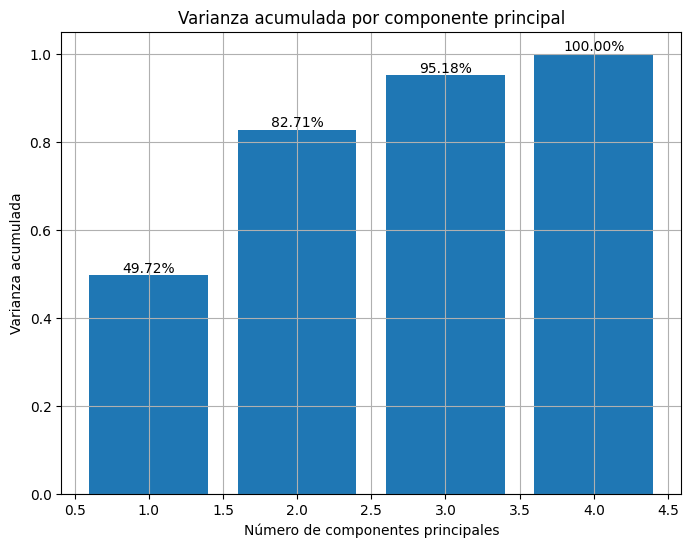

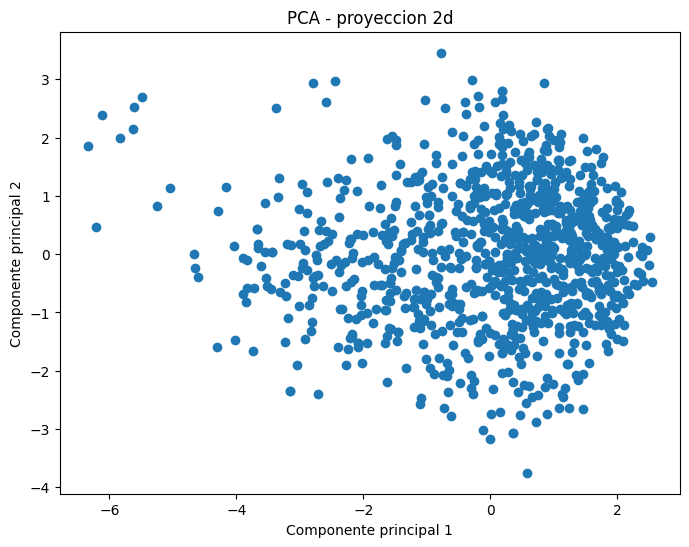

In [28]:
# Selección de las columnas relevantes
data = covers_df[['Energy', 'Loudness', 'Danceability', 'Valence']]

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

#PCA
pca = PCA()
pca.fit(data_scaled)

varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = varianza_explicada.cumsum()

#grafico
# Graficar la varianza acumulada
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(varianza_acumulada) + 1), varianza_acumulada)

# Imprimir los porcentajes de varianza acumulada
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height()*100:.2f}%', 
             ha='center', va='bottom', fontsize=10)

plt.title('Varianza acumulada por componente principal')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza acumulada')
plt.grid(True)
plt.show()

pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

#grafico
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.title('PCA - proyeccion 2d')
plt.show()

## Exploracion tendencia de acousticness atravez de los años

In [ ]:
group_medians = {
    "1980-1981": g1.median(),
    "1982-1983": g2.median(),
    "1984-1985": g3.median(),
    "1986-1987": g4.median(),
    "1988+": g5.median()
}

# Grafico
plt.plot(group_medians.keys(), group_medians.values(), marker='o')
plt.xlabel("Intervalo de Años")
plt.ylabel("Mediana de Acousticness")
plt.title("Tendencia de Acousticness a través de los años")
plt.show()

group_means = {
    "1980-1981": g1.mean(),
    "1982-1983": g2.mean(),
    "1984-1985": g3.mean(),
    "1986-1987": g4.mean(),
    "1988+": g5.mean()
}

# Grafico
plt.plot(group_means.keys(), group_means.values(), marker='o')
plt.xlabel("Intervalo de Años")
plt.ylabel("Promedio de Acousticness")
plt.title("Tendencia de Acousticness a través de los años")
plt.show()

In [ ]:
plt.figure(figsize=(10, 6))

groups = [g1, g2, g3, g4, g5]
group_labels = ["1980-1981", "1982-1983", "1984-1985", "1986-1987", "1988+"]

plt.boxplot(groups, vert=True, patch_artist=True, tick_labels=group_labels)

# gráfico
plt.title("Distribución de Acousticness por Intervalos de Año")
plt.xlabel("Intervalos de Año")
plt.ylabel("Acousticness")
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [ ]:
years = np.array([1980, 1982, 1984, 1986, 1988])  # Puedes ajustar a los años que corresponden a cada grupo
acoustic_values = [np.mean(g1), np.mean(g2), np.mean(g3), np.mean(g4), np.mean(g5)]

# Ajustar modelo Theil-Sen
years_reshaped = years.reshape(-1, 1)
model = TheilSenRegressor()
model.fit(years_reshaped, acoustic_values)

# Predicciones
predictions = model.predict(years_reshaped)

# Graficar resultados
plt.scatter(years, acoustic_values, color='blue', label='Promedio por grupo')
plt.plot(years, predictions, color='red', label='Tendencia (Theil-Sen)')
plt.xlabel('Año')
plt.ylabel('Valor Acústico Promedio')
plt.title('Regresión de Theil-Sen')
plt.legend()
plt.show()

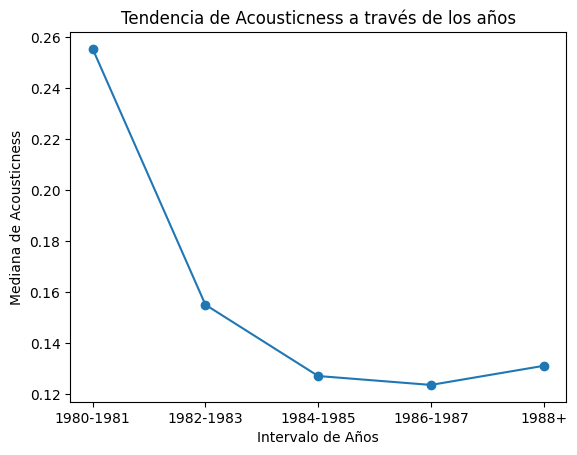

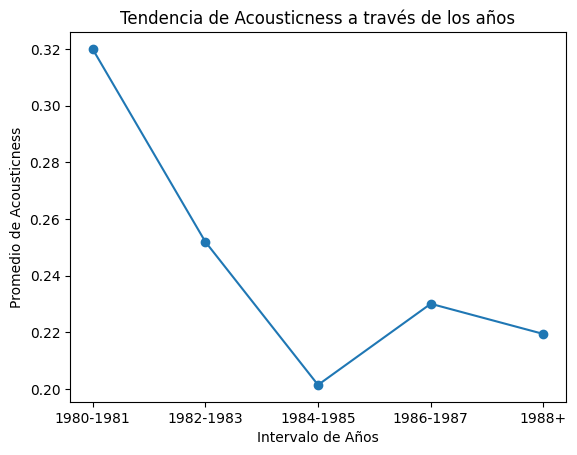

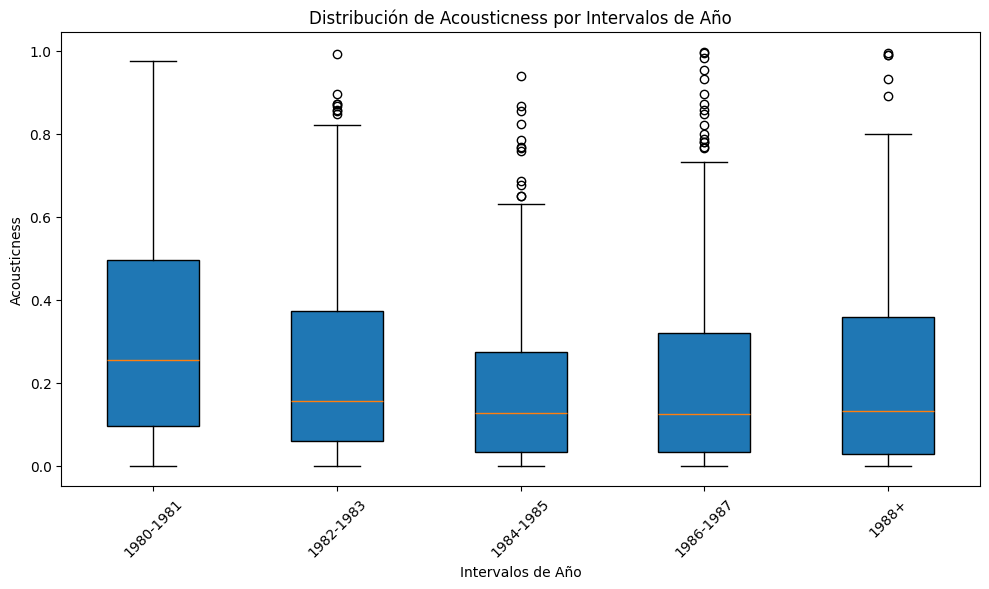

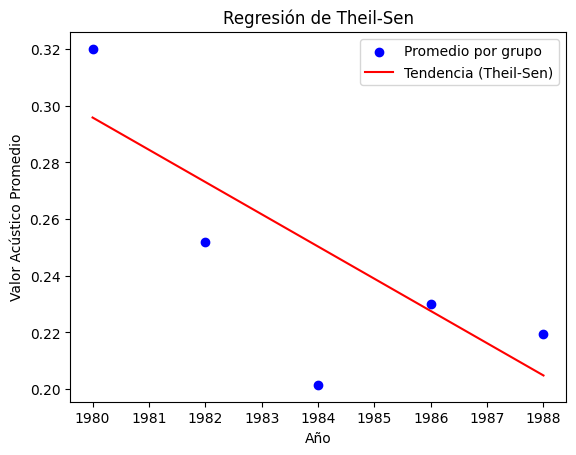

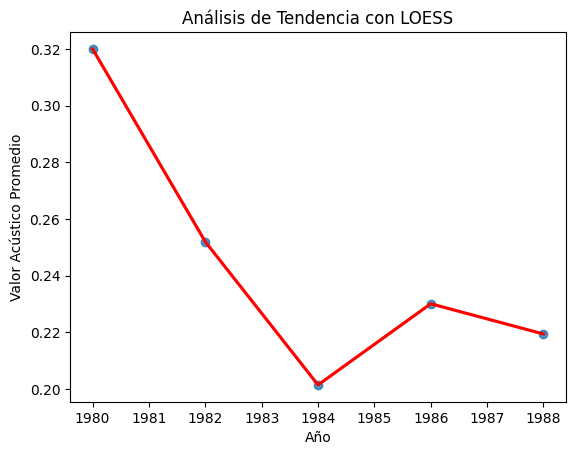

In [ ]:
years = np.array([1980, 1982, 1984, 1986, 1988])  # Ajusta los años según los grupos
acoustic_values = [np.mean(g1), np.mean(g2), np.mean(g3), np.mean(g4), np.mean(g5)]

# Graficar con LOESS usando seaborn
sns.regplot(x=years, y=acoustic_values, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Año')
plt.ylabel('Valor Acústico Promedio')
plt.title('Análisis de Tendencia con LOESS')
plt.show()

# 4. formulaciones de Hipotesis en base a la lectura de datos

#### <span style="color: yellow">¿Comportamientos especificos dados en la energía, bailabilidad, acústica ,valencia o incluso ruidosidad de las canciones pueden la popularidad de una cancion?</span>
Se sabe que las canciones más populares de las décadas pasadas compartían ciertas característica. Este análisis permitiría entender si las canciones que eran exitosas en los 80 compartían una combinación específica de factores musicales que favorecían su éxito.

#### <span style="color: yellow">¿La duración de la canción está relacionada con su popularidad?</span>
La duración de las canciones ha sido un tema recurrente en la industria musical, especialmente en la relación con su popularidad. Este estudio podría revelar si la duración es un factor relevante para el éxito de las canciones en ese periodo

#### <span style="color: yellow">¿El tono de la cancion esta determinado por su intensidad(Energy)?</span>
Esta hipótesis propone investigar si realmente la intensidad de la canción (energía) está vinculada directamente con el tono 

#### <span style="color: yellow">¿La reducción de la acústica a lo largo de los años es estadísticamente significativa? De ser así, ¿existe una relación entre esta disminución y el factor energético?</span>
Este planteamiento se hace en base a lo visto en los datos. No seria descabellado pensar que la acustica ha disminuido a lo largo de los años y que de comprobar que es significativa esta reduccion la energia tiene algo que ver con eso, ya que con los graficos realizados y las correlaciones obtenidas hasta el momento nos llevan a intuir esto mismo

#### <span style="color: yellow">¿El tempo influye en la bailabilidad y la energía de las canciones?</span>
El ritmo rápido a menudo está relacionado con una mayor energía y una mayor capacidad para mover al público. Esta hipótesis explora si existe una relación clara entre el tempo de las canciones de los 80 y su capacidad de ser percibidas como enérgicas y bailables

#### <span style="color: yellow">¿Que una cancion sea energetica es indicativo de ser ruidosa tambien?</span>
La correlacion nos plantea fuertemente una relacion entre estas 2 variables (0.7), indicandonos que es probable que la energia de una cancion este determinada por ser ruidosa o viceversa, lo que habria que corroborar con el planteamiento y demostracion de una hipotesis

# 5. Validaciones de hipotesis

## HIPOTESIS 1 : La energia de una cancion esta determinada por cuan ruidosa es

In [42]:
columnas_a_probar = ['Energy', 'Loudness']

# Shapiro-Wilk
for columna in columnas_a_probar:
    stat, p_value = shapiro(covers_df[columna])
    print(f"Resultados para {columna}:")
    print("Estadístico de Shapiro-Wilk:", stat)
    print("Valor p:", p_value)
    
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la distribución parece normal (p > 0.05).")
    else:
        print("Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05).")

    print("----------------------------")

Resultados para Energy:
Estadístico de Shapiro-Wilk: 0.9764501008396708
Valor p: 1.2214040537607329e-11
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05).
----------------------------
Resultados para Loudness:
Estadístico de Shapiro-Wilk: 0.9373484594147509
Valor p: 4.530923466832705e-20
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05).
----------------------------


In [43]:
# Realizar la prueba de Levene
estadistico, p_value = stats.levene(covers_df[columnas_a_probar[0]], covers_df[columnas_a_probar[1]])
print("Estadístico de Levene:", estadistico)
print("Valor p de Levene:", p_value)
print(f"|{columnas_a_probar[0]}-{columnas_a_probar[1]}|")
# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: No presentan homocedasticidad.")
else:
    print("No se rechaza la hipótesis nula: Presentan homocedasticidad.")
print("----------------------------")

Estadístico de Levene: 1294.2468559720214
Valor p de Levene: 7.355637497862763e-219
|Energy-Loudness|
Rechazamos la hipótesis nula: No presentan homocedasticidad.
----------------------------


In [86]:
#correlación de Spearman
correlation, p_value = spearmanr(covers_df['Energy'], covers_df['Loudness'])

print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Hay una correlación significativa entre Energy y Loudness (p < 0.05).")
else:
    print("No hay una correlación significativa entre Energy y Loudness (p >= 0.05).")
print("------------------")
from scipy.stats import kendalltau

tau, p_value = kendalltau(covers_df['Energy'], covers_df['Loudness'])

print(f"Estadístico de Kendall Tau: {tau}")
print(f"Valor p: {p_value}")

if p_value < 0.05:
    print("Se rechaza la hipótesis nula: existe una correlación monotónica significativa.")
else:
    print("No se rechaza la hipótesis nula: no existe una correlación monotónica significativa.")

Coeficiente de correlación de Spearman: 0.6731203181193343
Valor p: 1.1371158899403102e-132
Hay una correlación significativa entre Energy y Loudness (p < 0.05).
------------------
Estadístico de Kendall Tau: 0.4852534319915109
Valor p: 2.0519710621702044e-116
Se rechaza la hipótesis nula: existe una correlación monotónica significativa.


## HIPOTESIS 2 : La energía de una canción es un factor importante en la disminución de la acústica a lo largo del tiempo

In [47]:
columnas_a_probar = ['Acousticness', 'Year']

# Shapiro-Wilk
for columna in columnas_a_probar:
    stat, p_value = shapiro(covers_df[columna])
    print(f"Resultados para {columna}:")
    print("Estadístico de Shapiro-Wilk:", stat)
    print("Valor p:", p_value)
    
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la distribución parece normal.(p > 0.05) ")
    else:
        print("Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)")
    
    print("----------------------------")

Resultados para Acousticness:
Estadístico de Shapiro-Wilk: 0.8544534424087906
Valor p: 2.3639569060200315e-29
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)
----------------------------
Resultados para Year:
Estadístico de Shapiro-Wilk: 0.9353683935771572
Valor p: 2.2224387631221764e-20
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)
----------------------------


In [48]:
# Realizar la prueba de Levene
estadistico, p_value = stats.levene(covers_df[columnas_a_probar[0]], covers_df[columnas_a_probar[1]])
print("Estadístico de Levene:", estadistico)
print("Valor p de Levene:", p_value)
print(f"|{columnas_a_probar[0]}-{columnas_a_probar[1]}|")
# Interpretación
if p_value < 0.05:
    print("Rechazamos la hipótesis nula: No presentan homocedasticidad.")
else:
    print("No se rechaza la hipótesis nula: Presentan homocedasticidad.")
print("----------------------------")

Estadístico de Levene: 2611.1121209512335
Valor p de Levene: 0.0
|Acousticness-Year|
Rechazamos la hipótesis nula: No presentan homocedasticidad.
----------------------------


In [ ]:
prin_dec = covers_df[covers_df["Year"]<=1984]["Acousticness"]
fin_dec = covers_df[covers_df["Year"]>1984]["Acousticness"]

estadistico, p_value = stats.mannwhitneyu(prin_dec, fin_dec)

print("Estadistico de Man Whitney", estadistico)
print("Valor p de Man Whitney", p_value)

if p_value < 0.05:
    print("Rechazamos la hipotesis nula: Hay diferencia entre las muestras")
else:
    print("No rechazamos la hipotesis nula: No hay diferencias entre la muestras")
print("----------------------------")

Ahora, vamos a verificarlo usando Kruskal Wallis pero seccionandolo en intervalos de 2 años para seguir corroborando que hay diferencias significativas, no quiere decir que se deba a una reduccion, pero si nos podria dar un indicio de que la acustica ha ido cambiando.

g1 = covers_df[covers_df["Year"] <= 1981]["Acousticness"]
g2 = covers_df[(covers_df["Year"] > 1981) & (covers_df["Year"] <= 1983)]["Acousticness"]
g3 = covers_df[(covers_df["Year"] > 1983) & (covers_df["Year"] <= 1985)]["Acousticness"]
g4 = covers_df[(covers_df["Year"] > 1985) & (covers_df["Year"] <= 1987)]["Acousticness"]
g5 = covers_df[covers_df["Year"] > 1987]["Acousticness"]


estadistico, p_value = stats.kruskal(g1, g2, g3, g4, g5)

print("Estadístico de Kruskal-Wallis:", estadistico)
print("Valor p de Kruskal-Wallis:", p_value)

if p_value < 0.05:
    print("Rechazamos la hipótesis nula: Hay diferencias significativas entre los grupos")
else:
    print("No rechazamos la hipótesis nula: No hay diferencias significativas entre los grupos")
print("----------------------------")

In [ ]:
import numpy as np
from scipy.stats import linregress

# Definir los valores medios y sus periodos numéricos
x = np.array([1, 2, 3, 4, 5])  # Periodos codificados
y = np.array([g1.mean(), g2.mean(), g3.mean(), g4.mean(), g5.mean()])  # Medias de Acousticness

# Realizar la regresión lineal
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Mostrar resultados
print(f"Pendiente: {slope:.3f}")
print(f"Coeficiente de correlación (r): {r_value:.3f}")
print(f"P-valor: {p_value:.3f}")

if slope < 0 and p_value < 0.05:
    print("La tendencia acústica se ha reducido significativamente.")
else:
    print("No se detecta una reducción significativa en la tendencia acústica.")


Se reformula la hipotesis, se pasara a comprobar si el factor energia influye en la acustica independientemente del tiempo, dado que se demostro que la reduccion de la acustica no es lo suficiente significativa

#correlación de Spearman
correlation, p_value = spearmanr(covers_df['Acousticness'], covers_df['Energy'])

print("Coeficiente de correlación de Spearman:", correlation)
print("Valor p:", p_value)

if p_value < 0.05:
    print("Hay una correlación significativa entre Energy y Loudness (p < 0.05).")
else:
    print("No hay una correlación significativa entre Energy y Loudness (p >= 0.05).")
print("")

## HIPOTESIS 3 : El tempo es influida por la bailabilidad y la energía de las canciones

Vamos a proceder a comprobar la normalidad de estas distribuciones.

In [49]:
columnas_a_probar = ['Tempo', 'Danceability', 'Energy']

# Shapiro-Wilk
for columna in columnas_a_probar:
    stat, p_value = shapiro(covers_df[columna])
    print(f"Resultados para {columna}:")
    print("Estadístico de Shapiro-Wilk:", stat)
    print("Valor p:", p_value)
    
    if p_value > 0.05:
        print("No se rechaza la hipótesis nula: la distribución parece normal.(p > 0.05) ")
    else:
        print("Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)")
    print("")

Resultados para Tempo:
Estadístico de Shapiro-Wilk: 0.975249256423811
Valor p: 5.2341130855574875e-12
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Resultados para Danceability:
Estadístico de Shapiro-Wilk: 0.9912860525537478
Valor p: 1.249358796132413e-05
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)

Resultados para Energy:
Estadístico de Shapiro-Wilk: 0.9764501008396708
Valor p: 1.2214040537607329e-11
Se rechaza la hipótesis nula: la distribución no es normal (p <= 0.05)



In [50]:
for columna in columnas_a_probar[1:]:
    # Realizar la prueba de Levene
    estadistico, p_value = stats.levene(covers_df[columnas_a_probar[0]], covers_df[columna])
    print("Estadístico de Levene:", estadistico)
    print("Valor p de Levene:", p_value)
    print(f"|{columnas_a_probar[0]}-{columna}|")
    # Interpretación
    if p_value < 0.05:
        print("Rechazamos la hipótesis nula: No presentan homocedasticidad.")
    else:
        print("No se rechaza la hipótesis nula: Presentan homocedasticidad.")
    print("----------------------------")

Estadístico de Levene: 1397.8345988962833
Valor p de Levene: 2.671893901401824e-232
|Tempo-Danceability|
Rechazamos la hipótesis nula: No presentan homocedasticidad.
----------------------------
Estadístico de Levene: 1391.4344231747116
Valor p de Levene: 1.7587476855479867e-231
|Tempo-Energy|
Rechazamos la hipótesis nula: No presentan homocedasticidad.
----------------------------


In [51]:
X = covers_df[['Danceability', 'Energy']]  # Variables independientes
X = sm.add_constant(X)  # Agregar una constante para el término de intersección (intercepto)
y = covers_df['Tempo']  # Variable dependiente
modelo = sm.OLS(y, X).fit()
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                  Tempo   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     24.29
Date:                Sat, 23 Nov 2024   Prob (F-statistic):           5.02e-11
Time:                        00:12:21   Log-Likelihood:                -4653.1
No. Observations:                 998   AIC:                             9312.
Df Residuals:                     995   BIC:                             9327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          129.9230      4.100     31.686   

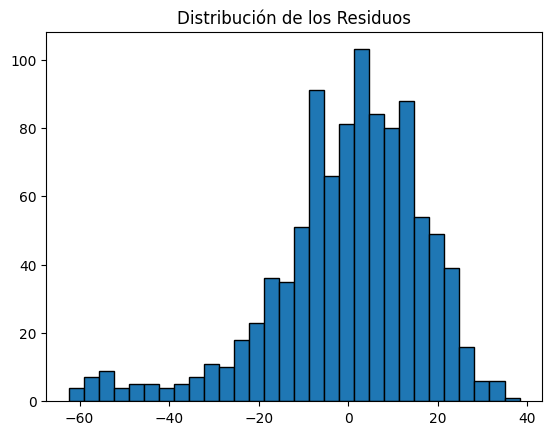

P-valor de Shapiro-Wilk: 0.00
Los residuos no siguen una distribución normal.


In [81]:
residuos = modelo.resid  # Residuos del modelo

plt.hist(residuos, bins=30, edgecolor='k')
plt.title('Distribución de los Residuos')
plt.show()

from scipy.stats import shapiro
stat, p_value = shapiro(residuos)
print(f"P-valor de Shapiro-Wilk: {p_value:.2f}")
if p_value > 0.05:
    print("Los residuos parecen seguir una distribución normal.")
else:
    print("Los residuos no siguen una distribución normal.")


In [ ]:
#correlación de Spearman
for columnas in columnas_a_probar[1:]:
    correlation, p_value = spearmanr(covers_df['Energy'], covers_df[columna])
    
    print("Coeficiente de correlación de Spearman:", correlation)
    print("Valor p:", p_value)
    
    if p_value < 0.05:
        print("Hay una correlación significativa entre Energy y Loudness (p < 0.05).")
    else:
        print("No hay una correlación significativa entre Energy y Loudness (p >= 0.05).")
    print("")

In [ ]:
for columnas in columnas_a_probar[1:]:
    tau, p_value = kendalltau(covers_df['Energy'], covers_df['Loudness'])
    
    print(f"Estadístico de Kendall Tau: {tau}")
    print(f"Valor p: {p_value}")
    
    if p_value < 0.05:
        print("Se rechaza la hipótesis nula: existe una correlación monotónica significativa.")
    else:
        print("No se rechaza la hipótesis nula: no existe una correlación monotónica significativa.")

Coeficiente de correlación de Spearman: 1.0
Valor p: 0.0
Hay una correlación significativa entre Energy y Loudness (p < 0.05).

Coeficiente de correlación de Spearman: 1.0
Valor p: 0.0
Hay una correlación significativa entre Energy y Loudness (p < 0.05).



## HIPOTESIS 4 : "La popularidad de una canción está determinada por patrones específicos en variables como energía, bailabilidad, acústica, valencia y ruidosidad"

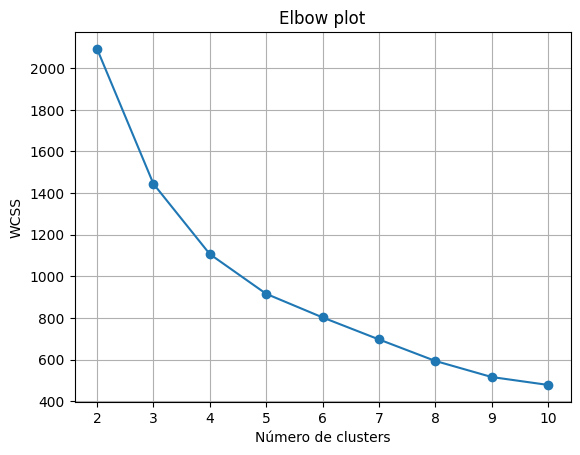

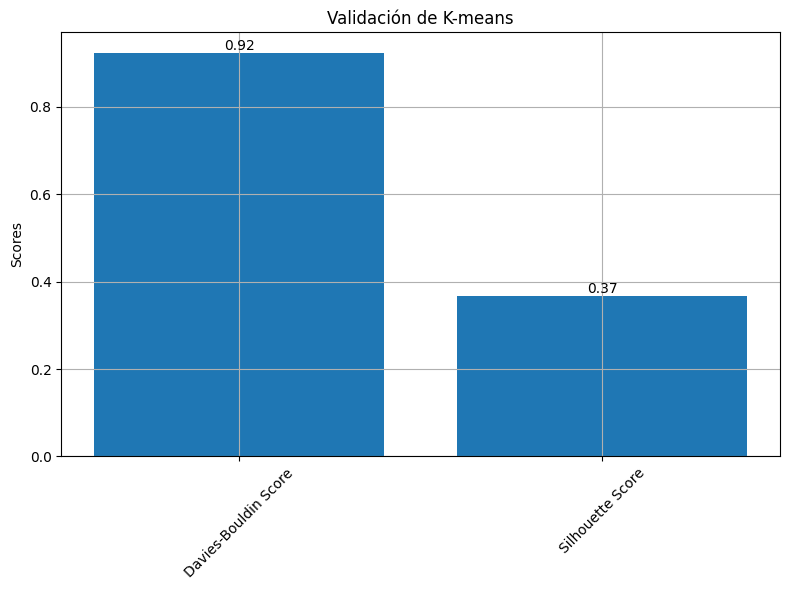

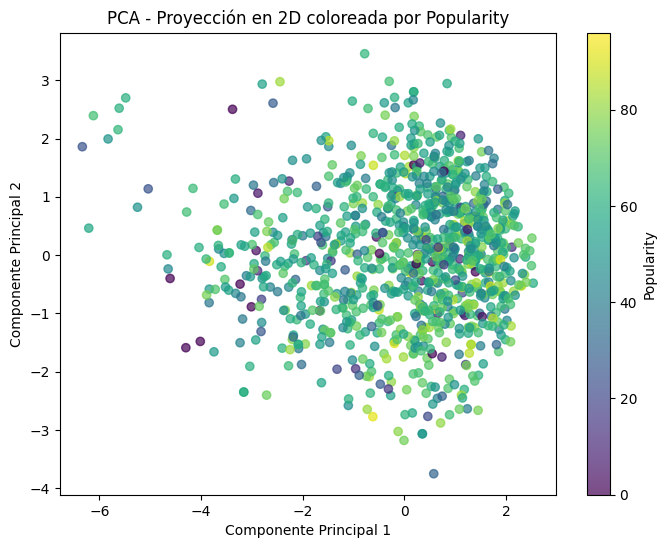

In [29]:
# calculamos cada KMean para cada número de clusters, y nos quedamos con el valor
wcss = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(pca_result)
    wcss.append(kmeans.inertia_)

# graficamos el elbow plot
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow plot')
plt.grid("True")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

n = 3

# Inicializar el modelo KMeans
kmeans = KMeans(n_clusters=n, verbose=0, random_state=10)
kmeans.fit(pca_result)  # Aplicamos KMeans a los resultados de PCA

# Obtener las asignaciones de los clusters
clusters_kmeans = kmeans.predict(pca_result)

# Calcular las métricas
db_score = davies_bouldin_score(pca_result, clusters_kmeans)
silhouette = silhouette_score(pca_result, clusters_kmeans)

# Almacenar los resultados
scores = [db_score, silhouette]
metrics = ['Davies-Bouldin Score', 'Silhouette Score']

# Graficar los resultados
plt.figure(figsize=(8, 6))
bars = plt.bar(range(1, len(scores) + 1), scores)

# Añadir los valores sobre cada barra
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f'{bar.get_height():.2f}', 
             ha='center', va='bottom', fontsize=10)

# Ajustar el gráfico
plt.title('Validación de K-means')
plt.ylabel('Scores')
plt.xticks(range(1, len(scores) + 1), metrics, rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


pca_df['Popularity'] = covers_df['Popularity']

# Graficar los resultados de PCA coloreados por Popularity
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Popularity'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Popularity')  # Barra de color para Popularity
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA - Proyección en 2D coloreada por Popularity')
plt.show()